문득 타이핑이 얼마나 많은 칼로리를 소모하는지 궁금해졌습니다. 하루 종일 키보드를 두드리면 꽤 많은 운동이 되지 않을까 하는 생각이 들었고 찾아보니 이미 계산해본 사람이 있었습니다.[^1] 이 글은 사실상 원저자의 글을 번역하고 추가로 코드 작성을 한 것입니다. 타이핑으로 소모되는 칼로리를 알아보기 위해 다음과 같은 단계로 계산해 보았습니다.

1. 1분 타이핑에 소모되는 칼로리 계산
2. 하루 동안의 타이핑 횟수 측정
3. 하루 총 소모 칼로리 계산

> 이 글은 비전문적임으로 재미로만 읽어 주시면 좋겠습니다.

# 1분 타이핑 칼로리 소모량 계산

타이핑 횟수를 측정하기 위해 아래와 같이 파이썬으로 간단한 GUI 프로그램을 만들었습니다. 혹시 나중에 개선할 지도 몰라서 [깃헙저장소](https://github.com/partrita/typecount)에 올려두었습니다.

## 파이썬 코드

```python
import tkinter as tk
from pynput.keyboard import Listener
import csv
from datetime import date
import os

class TypingCounter:
    def __init__(self, master):
        self.master = master
        master.title("Typing Counter v0.2.0")
        master.geometry("200x200+100+100")

        self.count = 0
        self.is_counting = False
        self.csv_file = "typing_count.csv"

        self.label = tk.Label(master, text="Count: 0")
        self.label.pack(pady=20)

        self.start_button = tk.Button(master, text="Start", command=self.start_counting)
        self.start_button.pack()

        self.stop_button = tk.Button(master, text="Stop", command=self.stop_counting, state=tk.DISABLED)
        self.stop_button.pack()

        self.save_button = tk.Button(master, text="Save", command=self.save_count)
        self.save_button.pack()

        self.quit_button = tk.Button(master, text="Quit", command=master.quit)
        self.quit_button.pack()

        self.listener = None

    def start_counting(self):
        self.is_counting = True
        self.start_button.config(state=tk.DISABLED)
        self.stop_button.config(state=tk.NORMAL)
        self.listener = Listener(on_press=self.on_press)
        self.listener.start()

    def stop_counting(self):
        self.is_counting = False
        self.start_button.config(state=tk.NORMAL)
        self.stop_button.config(state=tk.DISABLED)
        if self.listener:
            self.listener.stop()

    def on_press(self, key):
        if self.is_counting:
            self.count += 1
            self.label.config(text=f"Count: {self.count}")

    def save_count(self):
        today = date.today().isoformat()
        data = [today, self.count]
        
        file_exists = os.path.isfile(self.csv_file)
        
        with open(self.csv_file, 'a', newline='') as f:
            writer = csv.writer(f)
            if not file_exists:
                writer.writerow(["Date", "Count"])
            writer.writerow(data)
        
        print(f"Data saved: {data}")

root = tk.Tk()
app = TypingCounter(root)
root.mainloop()
```

이 코드는 다음과 같은 기능을 제공합니다:

1. 시작 버튼: 타이핑 카운트를 시작합니다.
2. 종료 버튼: 타이핑 카운트를 중지합니다.
3. 저장 버튼: 현재 날짜와 타이핑 횟수를 CSV 파일에 저장합니다.
4. 종료 버튼: 프로그램을 종료합니다.

CSV 파일 ('typing_count.csv')은 스크립트가 있는 폴더에 생성되며, 이미 파일이 존재하면 새로운 데이터를 추가합니다. 파일이 없으면 새로 생성하고 헤더를 추가합니다.이 프로그램은 사용자가 시작 버튼을 누를 때부터 타이핑 횟수를 세기 시작하고, 종료 버튼을 누르면 카운팅을 중지합니다. 저장 버튼을 누르면 현재 날짜와 카운트를 CSV 파일에 저장합니다.

## 심박수 기반의 칼로리 소모량 측정 공식

타이핑 중 소모되는 칼로리를 측정하기 위해 심박수를 기준으로 삼았습니다. 일반적으로 사용되는 공식은 다음과 같습니다:

$$
\text{소모 칼로리 (kcal/min)} = \frac{\text{심박수 (bpm)} \times \text{체중 (kg)} \times 0.6309}{1000}
$$

- **A:** 안정시 심박수에서 소모된 칼로리
- **B:** 타이핑 중 심박수에 의해 소모되는 칼로리

## Apple Watch로 심박수 측정

- 안정시 심박수: **88 bpm**
- 타이핑 중 심박수: **97 bpm**

## 1분 타이핑으로 소모된 칼로리 계산

체중은 65kg으로 가정합니다.

- A: 안정시 심박수에서 소모된 칼로리
  $$
  \text{소모 칼로리} = \frac{88 \times 65 \times 0.6309}{1000} \approx 3.6087 \text{ Kcal}
  $$

- B: 타이핑 중 소모된 칼로리
  $$
  \text{소모 칼로리} = \frac{97 \times 65 \times 0.6309}{1000} \approx 3.9778 \text{ Kcal}
  $$

- AB: 약 1분 동안의 차이는
  $$
  3.9778 - 3.6087 \approx 0.3691 \text{ Kcal}
  $$

- 한 번의 타이핑으로 소모되는 칼로리는
  $$
  \frac{0.3691}{222} \approx 0.0016 \text{ Kcal}
  $$

결과적으로 한 번의 타이핑으로 약 **0.0016 Kcal**를 소비하는 것으로 나타났습니다.

# 하루 평균 얼마나 타이핑 하는지 측정

앞서 만든 프로그램으로 연말 기간동안 하루의 타이핑량을 측정해서 CSV 파일로 저장했습니다. 아래는 그 결과를 불러와서 시각화하는 코드입니다.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("../typing_count.csv")
# 날짜 열을 datetime 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])
df.head()


,Date,Count
0,2024-12-12,14246
1,2024-12-13,19144
2,2024-12-14,18096
3,2024-12-15,24999
4,2024-12-16,23141


## 평균 타이핑 시각화

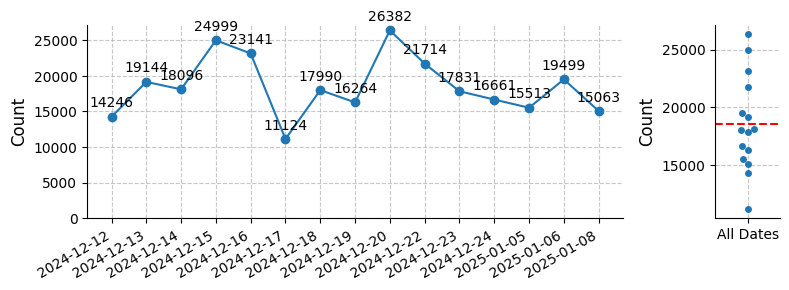

Overall Mean: 18511.13


In [9]:
# 전체 평균값 계산
overall_mean = df['Count'].mean()

# 서브플롯 생성 (비율 조정)
fig = plt.figure(figsize=(8, 3))
gs = fig.add_gridspec(1, 5)  # 4:1 비율로 그리드 설정

# 첫 번째 플롯: 선 그래프 (4칸 차지)
ax1 = fig.add_subplot(gs[0, :4])
ax1.plot(df['Date'], df['Count'], marker='o')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlabel('', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)
fig.autofmt_xdate()
ax1.set_ylim(bottom=0)
for i, count in enumerate(df['Count']):
    ax1.annotate(str(count), (df['Date'][i], count), textcoords="offset points", xytext=(0, 7), ha='center')

# 두 번째 플롯: 스웜 플롯 (1칸 차지)
ax2 = fig.add_subplot(gs[0, 4])
sns.swarmplot(x=['All Dates'] * len(df), y='Count', data=df, ax=ax2)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.axhline(y=overall_mean, color='red', linestyle='--', label=f'Mean: {overall_mean:.2f}')
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.7)

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()

# 평균값 출력
print(f"Overall Mean: {overall_mean:.2f}")


위 결과를 통해 하루에 타이핑으로 소비되는 총 칼로리를 계산 할 수 있습니다. 

# 하루 타이핑 총 소모 칼로리 계산

하루 평균 타이핑 횟수가 **18,511회** 임으로

$$
\text{일일 칼로리 소비량} = 18,511 \times 0.0016 \approx 29.6176 \text{ Kcal} 
$$

타이핑으로 하루 동안 소모되는 칼로리는 약 **29.6 Kcal**입니다.

## 결론

29.6 Kcal는 제 예상보다는 높은 수치지만 초콜릿 한 조각에 해당하는 열량이라고 합니다. 만약 운동으로 이 정도의 칼로리를 소모하려면 걷기 10분 정도가 필요하다고 합니다.
역시 앉아서 타이핑만 하지 말고 좀 걸어야 겠습니다.

# Reference

[^1] : https://qiita.com/mercy-333/items/cf2e0f0b040926184004